# **Homework 3**

- **Authors:** Anahí Andrade (00323313), Mateo Salgado (00324999)

- **Course:** CMP 5006 - Information Security (NRC: 3715)

- **Institution:** Universidad San Francisco de Quito

---
## **Part 1: Research and Analysis of DDoS Attack Techniques (Unchanged)**

**Objective:** Students will conduct in-depth research on the common methods used to execute Distributed Denial of Service (DDoS) attacks, focusing on the layers of the OSI model they target and how they operate.

### **Task A: Categorization and Description**

Research and define the three primary categories of DDoS attacks (Volumetric, Protocol, Application Layer). For each category, describe its goal and provide at least two specific attack examples. Present your findings in a comparison table.

| DDoS Category | OSI Layer(s) Targeted | Primary Goal of Attack | Specific Attack Example 1 | Specific Attack Example 2 |
|---------------|----------------------|------------------------|---------------------------|---------------------------|
| **Volumetric** | L3, L4 | Consume all available bandwidth | **UDP Flood** | **DNS Amplification** |
| **Protocol** | L3, L4 | Exhaust server connection state tables | **SYN Flood** | **ICMP Flood** |
| **Application Layer** | L7 | Exhaust application/server resources | **HTTP Flood** | **Slowloris** |

### **Task B: In-Depth Attack Profile**

Choose one specific attack from your table (e.g., DNS Amplification) and write a detailed profile (250-350 words) that explains its Mechanism, the Resource Exhaustion it causes, and how Botnets/Amplification are used.

---
# **Part 1. Solución:**

### **Task A:**


| DDoS Category        | OSI Layer(s) Targeted | Primary Goal of Attack                                                                                                                                               | Specific Attack Example 1 | Specific Attack Example 2 | EXTRA Example 3        | EXTRA Example 4           | EXTRA Example 5            |
|----------------------|------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------|---------------------------|-------------------------|----------------------------|-----------------------------|
| **Volumetric**       | L3, L4                 | Saturar el ancho de banda mediante enormes volúmenes de tráfico. Los ataques EXTRA (NTP Amplification, Chargen Flood, SSDP Amplification) usan **protocolos de reflexión/amplificación** para multiplicar el tráfico y congestionar la red.   | UDP Flood                | DNS Amplification         | NTP Amplification       | Chargen Flood              | SSDP Amplification         |
| **Protocol (State)** | L3, L4                 | Agotar tablas de estado enviando paquetes especialmente manipulados. Los ataques EXTRA (TCP Fragmentation, RST/ACK Flood, TCP Christmas Tree) fuerzan al servidor/firewall a procesar estados anómalos hasta colapsar sus recursos.            | SYN Flood               | ICMP Flood                | TCP Fragmentation Attack | RST/ACK Flood              | TCP Christmas Tree Attack  |
| **Application Layer**| L7                     | Consumir recursos internos de la aplicación enviando peticiones costosas de procesar. Los ataques EXTRA (Slow POST, XXE Flood, HTTP Recursive GET) obligan al servidor a usar CPU/RAM en tareas lentas hasta dejarlo inoperativo.               | HTTP Flood               | Slowloris                 | Slow POST attack        | XML External Entity (XXE) Flood | HTTP Recursive GET Attack |


### **Task B:**


### **Volumetric: NTP Amplification Attack**
El ataque NTP Amplification es un tipo de DDoS volumétrico que explota la capacidad del protocolo Network Time Protocol o tambien NTP para amplificar grandes cantidades de tráfico hacia una víctima. Su mecanismo depende del uso indebido de servidores NTP mal configurados, específicamente aquellos que aún mantienen habilitado el comando `monlist`, una función que devuelve una lista de los últimos 600 hosts que se han conectado al servidor. El atacante envía una solicitud pequeña, falsificando la dirección IP de la víctima como si fuera el origen legítimo. Cuando el servidor responde, envía un paquete mucho más grande directamente hacia la víctima, generando una amplificación significativa en el tráfico recibido. Esta técnica permite multiplicar varias veces el volumen de datos enviado por el atacante, lo que convierte la botnet en una fuerza altamente destructiva incluso si sus nodos tienen poca capacidad individual.

En términos de agotamiento de recursos, este ataque está diseñado para saturar completamente el ancho de banda disponible de la víctima. A medida que cientos o miles de servidores NTP reflejan y amplifican sus respuestas, el tráfico entrante puede alcanzar niveles capaces de congestionar enlaces troncales dentro de la infraestructura del objetivo. El resultado típico es la pérdida total de disponibilidad, ya que servicios, aplicaciones y comunicaciones dejan de funcionar automáticamente cuando el tráfico supera la capacidad de la red. El rol de las botnets es fundamental, ya que permiten generar solicitudes distribuidas desde múltiples ubicaciones, lo que dificulta la mitigación basada en filtros simples. Debido a la combinación entre amplificación y distribución, el ataque NTP Amplification sigue siendo uno de los métodos volumétricos más efectivos y peligrosos cuando los servidores expuestos no han sido adecuadamente deshabilitados o actualizados.


### **Protocol (State): TCP Fragmentation Attack**

El ataque TCP Fragmentation es un tipo de DDoS orientado a agotar los recursos de estado en dispositivos como firewalls, balanceadores de carga y servidores que deben reconstruir flujos TCP fragmentados. Su mecanismo consiste en enviar paquetes TCP intencionalmente divididos en fragmentos extremadamente pequeños o desalineados, de forma que el dispositivo objetivo se vea obligado a almacenar cada pieza en memoria y esperar fragmentos adicionales para reconstruir el flujo completo. Debido a que las reglas del protocolo requieren mantener una tabla de estado para cada conexión parcial, el atacante puede generar miles de pseudo-conexiones incompletas que consumen memoria, capacidad de procesamiento y entradas en la tabla de estados. Como consecuencia, el sistema entra en un estado de saturación en el cual no puede aceptar nuevas conexiones legítimas.

Este tipo de ataque no depende del volumen de tráfico, sino del costo computacional que se genera al obligar al servidor a procesar fragmentos inválidos o incompletos. El agotamiento ocurre cuando las tablas internas de seguimiento se llenan, lo que afecta directamente la disponibilidad del servicio. A diferencia de ataques puramente volumétricos, la naturaleza de TCP Fragmentation dificulta la respuesta mediante filtrado por ancho de banda, ya que cada fragmento es técnicamente válido según el protocolo. El uso de botnets amplifica el impacto al distribuir solicitudes maliciosas desde múltiples puntos, creando miles de flujos simultáneos que parecen conexiones legítimas en diferentes etapas de reconstrucción. Esta distribución evita que mecanismos simples basados en IP bloqueen el ataque, ya que cada bot aporta una pequeña cantidad de tráfico pero una gran carga lógica sobre el sistema. Debido a sus características, el ataque TCP Fragmentation representa una amenaza sofisticada para infraestructuras críticas que dependen de dispositivos de inspección profunda de paquetes.

### **Application Layer: Slow POST Attack**

El ataque Slow POST es un tipo de DDoS en la capa de aplicación cuyo objetivo es agotar los recursos de un servidor web obligándolo a mantener abiertas múltiples conexiones http de manera prolongada. Su funcionamiento se basa en enviar solicitudes POST legítimas, pero transmitiendo el cuerpo del mensaje a una velocidad extremadamente lenta, a veces enviando solo unos pocos bytes por segundo. El servidor, siguiendo las reglas del protocolo, debe mantener la conexión activa mientras espera que llegue el resto del contenido, lo que consume memoria, hilos de ejecución y ciclos de CPU. A diferencia de ataques volumétricos, Slow POST no requiere grandes cantidades de tráfico, su efectividad se origina en la ineficiencia estructural que surge cuando un servidor mantiene conexiones incompletas durante largos periodos.

El agotamiento de recursos ocurre porque cada conexión retenida ocupa un hilo o proceso en el servidor, y la mayoría de servidores web tienen límites estrictos en la cantidad de solicitudes concurrentes que pueden manejar. Cuando cientos o miles de conexiones Slow POST se encuentran abiertas al mismo tiempo, el servidor llega rápidamente al límite y comienza a rechazar solicitudes legítimas o tarda varios segundos en procesarlas. Este ataque es particularmente peligroso porque utiliza tráfico completamente válido desde el punto de vista del protocolo HTTP, lo que dificulta su detección mediante reglas convencionales. Las botnets amplifican la amenaza permitiendo que miles de nodos mantengan conexiones lentas simultáneas desde diferentes direcciones IP, lo que impide bloquear el ataque únicamente mediante filtrado por origen. Por su naturaleza de bajo tráfico pero alto consumo de recursos, Slow POST se mantiene como una de las técnicas más efectivas dentro de los ataques de denegación de servicio en la capa de aplicación.

---

## **Part 2: Hands-On: DVWA Deployment and Common Attacks**

**Objective:** Students will deploy a vulnerable web application using Docker and execute common web attacks in a safe, controlled environment, learning to bypass **basic** security measures.

**Ethical Warning:** This task is for **educational, local simulation only**. Students are **strictly forbidden** from attempting these attacks on any public, external, or third-party web resource.

### **Task A: DVWA Installation via Docker**

i. Ensure **Docker** is installed and running on your local machine.

ii. Pull and run the Damn Vulnerable Web Application (DVWA) using a public Docker image (e.g., vulnerables/web-dvwa or citizenstig/dvwa). You will need to map a local port (e.g., port 80) to the container's web server.

**Example Command:** `docker run --rm -it -p 80:80 vulnerables/web-dvwa`

iii. Access the DVWA login page at http://localhost/ (or your mapped port). Log in with the default credentials (admin/password) and complete the database setup.

iv. **Submission:** Provide the exact Docker command(s) you used to pull and run the container, and a screenshot of the DVWA home page.

### **Task B: Attack Execution and Documentation (Medium Security)**

i. Set the DVWA security level to **Medium**. This level often includes functions like mysql_real_escape_string() for SQLi, or basic string replacement for XSS, requiring students to look for weaknesses like lack of case sensitivity or incomplete filtering.

ii. Successfully execute **three** distinct common web application attacks using the DVWA menu options. Focus on vulnerabilities from the **OWASP Top 10**:

- **SQL Injection (SQLi):** You may need to use **time-based blind techniques** or other bypasses since the standard UNION attack may be sanitized.

- **Cross-Site Scripting (XSS):** You may need to bypass basic input filters by using different encodings, event handlers, or mixed-case tags.

- **Command Injection:** Look for ways to bypass filtering of commands like | or & by using other command separators (e.g., &&, ||, or \n).

iii. For each of the three attacks, provide:

- The **Vulnerability Name** (e.g., SQL Injection).

- The **Payload** used (the malicious input string).

- A **Screenshot** of the successful exploitation (e.g., the alert box for XSS, or the SQL query result for SQLi).

- A **brief explanation** (1-2 sentences) of *why* the attack payload needed to be modified to bypass the Medium security filter.

---
# **Part 2. Solución:**

## **Task A: DVWA Installation via Docker**

**WSL working directory:**

```
bash
cd ~/seguridad/hw3    // por ejemplo
```

**Docker commands used:**

```
docker pull vulnerables/web-dvwa

docker run --rm -it \
  --name dvwa \
  -p 8080:80 \
  vulnerables/web-dvwa
```


**Screenshot – DVWA home (Medium security funcionando):**


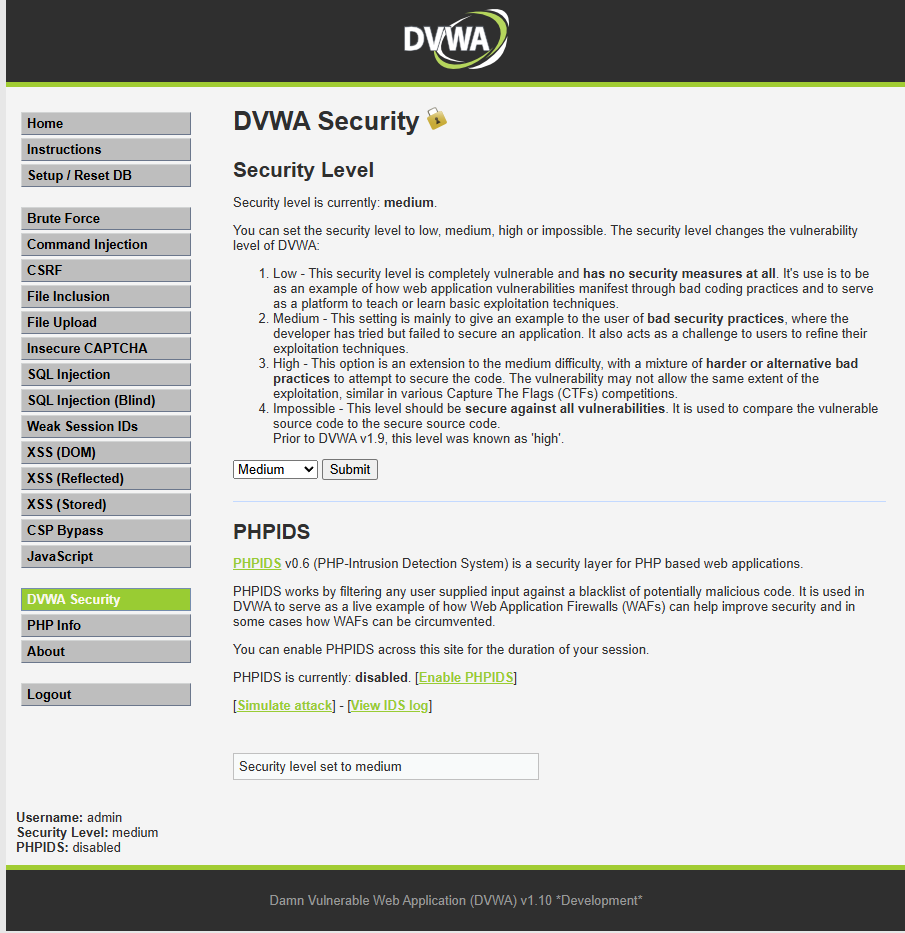


---

### **Task B: Attack Execution and Documentation (Medium Security)**

### **Ataque 1: SQL Injection (SQLi) - Medium Level**


#### **Contexto del Nivel Medium:**
En nivel Medium, DVWA implementa dos medidas de seguridad:
1. **Interfaz dropdown (select)** que limita las opciones del usuario a valores predefinidos (1-5).
2. **Función `mysql_real_escape_string()`** en el backend que escapa caracteres especiales como comillas simples.

Sin embargo, estas protecciones pueden ser bypasseadas modificando el HTML del cliente.

#### **Procedimiento de Explotación:**

##### Paso 1: Inspeccionar el elemento HTML
1. Hacer clic derecho sobre el dropdown "User ID"
2. Seleccionar "Inspeccionar elemento" o "Inspect"
3. Se abrirán las Developer Tools mostrando el código HTML

##### Paso 2: Modificar el elemento `<select>`
- En el código HTML, localizar:
```html
<select name="id">
  <option value="1">1</option>
  <option value="2">2</option>
  <option value="3">3</option>
  <option value="4">4</option>
  <option value="5">5</option>
</select>
```

##### Paso 3: Editar como HTML
1. Hacer clic derecho sobre el elemento `<select>` en el inspector
2. Seleccionar "Edit as HTML"
3. Reemplazar todo el bloque `<select>...</select>` con:
```html
<input type="text" name="id" value="1">
```

##### Paso 4: Ingresar el payload malicioso
- En el nuevo campo de texto que apareció, ingresar:
```sql
1 OR 1=1
```

##### Paso 5: Ejecutar el ataque
- Hacer clic en el botón "Submit"

#### Payload Utilizado
```sql
1 OR 1=1
```

### **Resultado del Ataque:**
El ataque fue exitoso y extrajo **todos los usuarios** de la base de datos:
```
ID: 1
First name: admin
Surname: admin

ID: 2
First name: Gordon
Surname: Brown

ID: 3
First name: Hack
Surname: Me

ID: 4
First name: Pablo
Surname: Picasso

ID: 5
First name: Bob
Surname: Smith
```

### **Explicación del Bypass:**

**¿Por qué funciona este ataque en Medium?**

1. **El dropdown es solo cosmético**: La restricción de valores está en el lado del cliente (HTML), no en el servidor. Al modificar el HTML localmente, podemos enviar cualquier valor.

2. **El payload numérico evita `mysql_real_escape_string()`**: La función `mysql_real_escape_string()` escapa comillas y caracteres especiales, pero cuando usamos un payload **puramente numérico y lógico** como `1 OR 1=1`, no hay comillas que escapar.

3. **La consulta SQL resultante**:
```sql
SELECT first_name, last_name FROM users WHERE user_id = 1 OR 1=1;
```
La condición `OR 1=1` siempre es verdadera, por lo que la query devuelve **todos** los registros en lugar de solo uno.

4. **Falta de validación del tipo de dato**: El backend no valida que el parámetro `id` sea realmente un número entero simple, permitiendo la inyección de lógica SQL adicional.

### **Screenshot del Ataque Exitoso:**




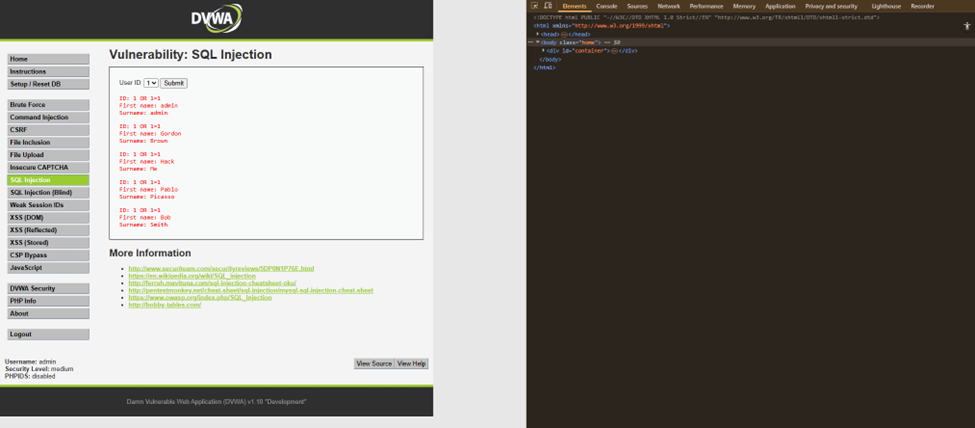

*La imagen muestra los 5 usuarios extraídos de la base de datos usando el payload `1 OR 1=1`*



---

## **Ataque 2: Cross-Site Scripting (XSS Reflected) - Medium Level**

### **Contexto del Nivel Medium:**
En nivel Medium, DVWA implementa un filtro básico de seguridad que intenta prevenir XSS:
- Usa la función `str_replace('<script>', '', $input)` para eliminar el tag `<script>`
- El filtro es **case-sensitive**, solo detecta `<script>` en minúsculas exactas.
- No filtra event handlers, tags alternativos ni variaciones de capitalización.
- No implementa output encoding ni sanitización completa del input.

### **Vulnerabilidad:**
La aplicación refleja el input del usuario directamente en el código HTML sin sanitización adecuada. El filtro implementado es insuficiente ya que solo bloquea un patrón específico, permitiendo múltiples vectores de ataque XSS.

---

### **Técnica de Bypass 1: Mixed-Case Tags**

#### **Payload Utilizado:**
```html
<ScRiPt>alert('XSS')</ScRiPt>
```

##### **Procedimiento:**
1. Navegar a "XSS (Reflected)" en el menú lateral de DVWA
2. Verificar que el nivel de seguridad esté en **Medium**
3. En el campo "What's your name?", ingresar: `<ScRiPt>alert('XSS')</ScRiPt>`
4. Hacer clic en "Submit"
5. Observar la ejecución del alert box

##### **Explicación del Bypass:**
El filtro de Medium usa `str_replace()` que es **case-sensitive**:
```php
$name = str_replace('<script>', '', $_GET['name']);
```

**Esta implementación presenta vulnerabilidades críticas:**
- Solo busca el patrón exacto `<script>` en minúsculas
- **No detecta variaciones de capitalización** como `<Script>`, `<SCRIPT>`, o `<ScRiPt>`
- El navegador interpreta los tags HTML de forma **case-insensitive**, por lo que `<ScRiPt>` se ejecuta igual que `<script>`
- Resultado: El payload pasa el filtro intacto y se ejecuta en el navegador

##### **Screenshot:**
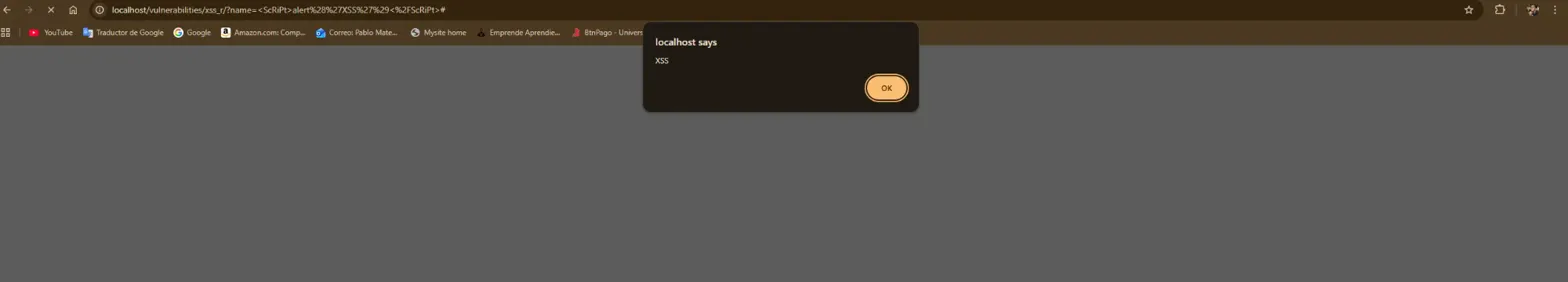

*URL resultante muestra el payload encoded: `localhost/vulnerabilities/xss_r/?name=<ScRiPt>alert%28%27XSS%27%29</ScRiPt>`*

---

#### **Técnica de Bypass 2: Event Handlers**

##### **Payload Utilizado:**
```html
<img src=x onerror=alert('XSS')>
```

##### **Procedimiento:**
1. En el mismo módulo "XSS (Reflected)" en nivel Medium
2. En el campo "What's your name?", ingresar: `<img src=x onerror=alert('XSS')>`
3. Hacer clic en "Submit"
4. Observar la ejecución del alert box

##### **Explicación del Bypass:**
Este payload evita completamente el filtro de `<script>`:

1. **No usa el tag `<script>`**: El filtro solo busca y elimina `<script>`, por lo que cualquier otro tag HTML pasa sin restricción.

2. **Explota event handlers de JavaScript**: HTML permite event handlers en muchos tags. El atributo `onerror` ejecuta código JavaScript cuando ocurre un error.

3. **Fuerza un error intencional:**
   - `<img src=x>` intenta cargar una imagen desde la fuente "x"
   - "x" no es una URL válida, causando un error de carga
   - Este error dispara el event handler `onerror`

4. **Ejecuta código arbitrario**: El código `alert('XSS')` dentro del `onerror` se ejecuta en el contexto del navegador.


##### **Screenshot:**

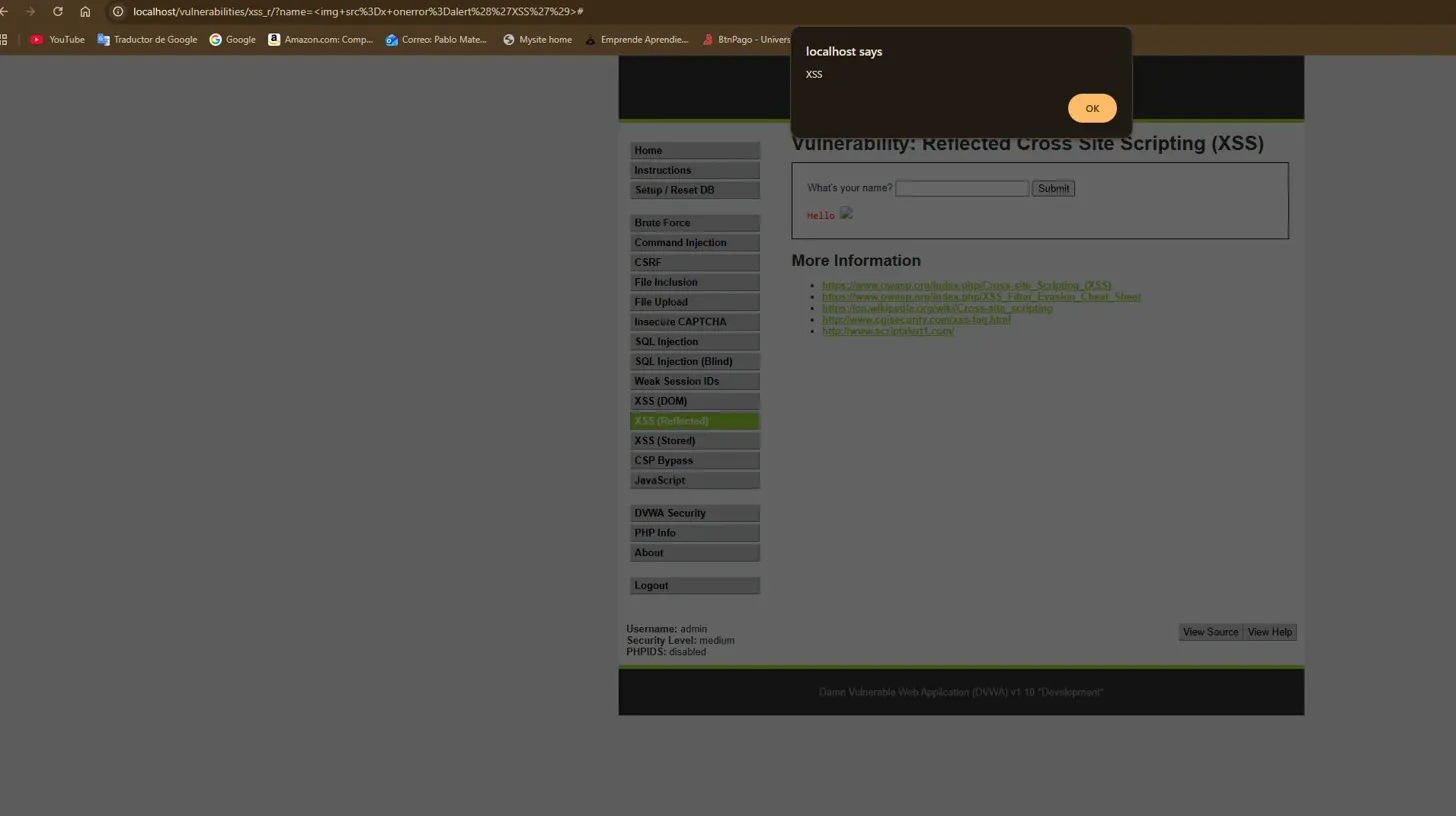


*URL resultante: `localhost/vulnerabilities/xss_r/?name=<img+src%3Dx+onerror%3Dalert%28%27XSS%27%29>`*

---

#### **Comparación de Técnicas de Bypass:**

| Técnica | Payload | Ventaja | Limitación |
|---------|---------|---------|------------|
| **Mixed-Case** | `<ScRiPt>alert('XSS')</ScRiPt>` | Simple, directo, usa sintaxis familiar | Filtros más avanzados pueden hacer case-insensitive matching |
| **Event Handler** | `<img src=x onerror=alert('XSS')>` | Evita completamente la detección de `<script>`, muchas variantes disponibles | Requiere conocimiento de event handlers HTML |

---

#### **Conclusión:**

Se demostraron exitosamente **dos técnicas distintas** para bypassear el filtro XSS de nivel Medium:
1.  **Mixed-case tags** - Explotando la sensibilidad a mayúsculas del filtro
2.  **Event handlers** - Usando vectores de ataque alternativos completamente

Ambos ataques fueron exitosos, cumpliendo con los requisitos del ejercicio de demostrar múltiples métodos de bypass de filtros básicos de XSS.


---


### **Ataque 3: Command Injection - Medium Level**

#### **Contexto del Nivel Medium:**
En nivel Medium, DVWA implementa filtrado de separadores de comandos para prevenir command injection:

**Filtros aplicados en Medium:**
```php
$substitutions = array(
    '&&' => '',
    ';'  => '',
);
```

El código reemplaza `&&` y `;` con cadenas vacías, intentando prevenir el encadenamiento de comandos.

**Filtros NO aplicados (vulnerabilidades):**
- `|` (pipe) - Redirige output de un comando a otro
- `||` (OR lógico) - Ejecuta segundo comando si el primero falla
- `&` (background) - Ejecuta comandos en paralelo
- `%0a` (newline) - Salto de línea como separador

#### **Vulnerabilidad:**
La aplicación ejecuta un comando `ping` concatenando directamente el input del usuario sin validación adecuada del tipo de dato ni sanitización completa. El filtrado parcial (blacklist) deja múltiples vectores de ataque disponibles.

---

#### **Técnica de Bypass 1: Pipe Operator `|`**

##### **Payloads Utilizados:**

**Payload 1: Identificación de usuario**
```bash
127.0.0.1 | whoami
```

**Payload 2: Listado de archivos**
```bash
127.0.0.1 | ls -la
```

**Payload 3: Lectura de archivo sensible**
```bash
127.0.0.1 | cat /etc/passwd
```

#### **Procedimiento:**
1. Navegar a "Command Injection" en el menú lateral de DVWA
2. Verificar que el nivel de seguridad esté en **Medium**
3. En el campo "Enter an IP address", ingresar uno de los payloads
4. Hacer clic en "Submit"
5. Observar la ejecución del comando inyectado

#### **Explicación del Bypass:**
El operador pipe `|` en sistemas Unix/Linux:
- Toma la salida (stdout) del comando izquierdo
- La pasa como entrada (stdin) al comando derecho
- **No está filtrado en Medium level**

**Comando ejecutado en el servidor:**
```bash
ping -c 4 127.0.0.1 | whoami
```

El resultado del ping se descarta y solo se muestra la salida de `whoami`, que revela que el servidor web corre como usuario `www-data`.

#### **Resultados Obtenidos:**

**Con `whoami`:**
```
www-data
```

**Con `ls -la`:**
```
total 20
drwxr-xr-x 1 www-data www-data 4096 Oct 12  2018 .
drwxr-xr-x 1 www-data www-data 4096 Oct 12  2018 ..
-rw-r--r-- 1 www-data www-data 1836 Oct 12  2018 index.php
-rw-r--r-- 1 www-data www-data 4096 Oct 12  2018 source
[... más archivos ...]
```

**Con `cat /etc/passwd`:**
```
root:x:0:0:root:/root:/bin/bash
daemon:x:1:1:daemon:/usr/sbin:/usr/sbin/nologin
bin:x:2:2:bin:/bin:/usr/sbin/nologin
sys:x:3:3:sys:/dev:/usr/sbin/nologin
sync:x:4:65534:sync:/bin:/bin/sync
games:x:5:60:games:/usr/games:/usr/sbin/nologin
man:x:6:12:man:/var/cache/man:/usr/sbin/nologin
lp:x:7:7:lp:/var/spool/lpd:/usr/sbin/nologin
mail:x:8:8:mail:/var/mail:/usr/sbin/nologin
news:x:9:9:news:/var/spool/news:/usr/sbin/nologin
uucp:x:10:10:uucp:/var/spool/uucp:/usr/sbin/nologin
proxy:x:13:13:proxy:/bin:/usr/sbin/nologin
www-data:x:33:33:www-data:/var/www:/usr/sbin/nologin
backup:x:34:34:backup:/var/backups:/usr/sbin/nologin
list:x:38:38:Mailing List Manager:/var/list:/usr/sbin/nologin
irc:x:39:39:ircd:/var/run/ircd:/usr/sbin/nologin
gnats:x:41:41:Gnats Bug-Reporting System (admin):/var/lib/gnats:/usr/sbin/nologin
nobody:x:65534:65534:nobody:/nonexistent:/usr/sbin/nologin
_apt:x:100:65534::/nonexistent:/bin/false
mysql:x:101:101:MySQL Server,,,:/nonexistent:/bin/false
```

#### **Screenshot:**
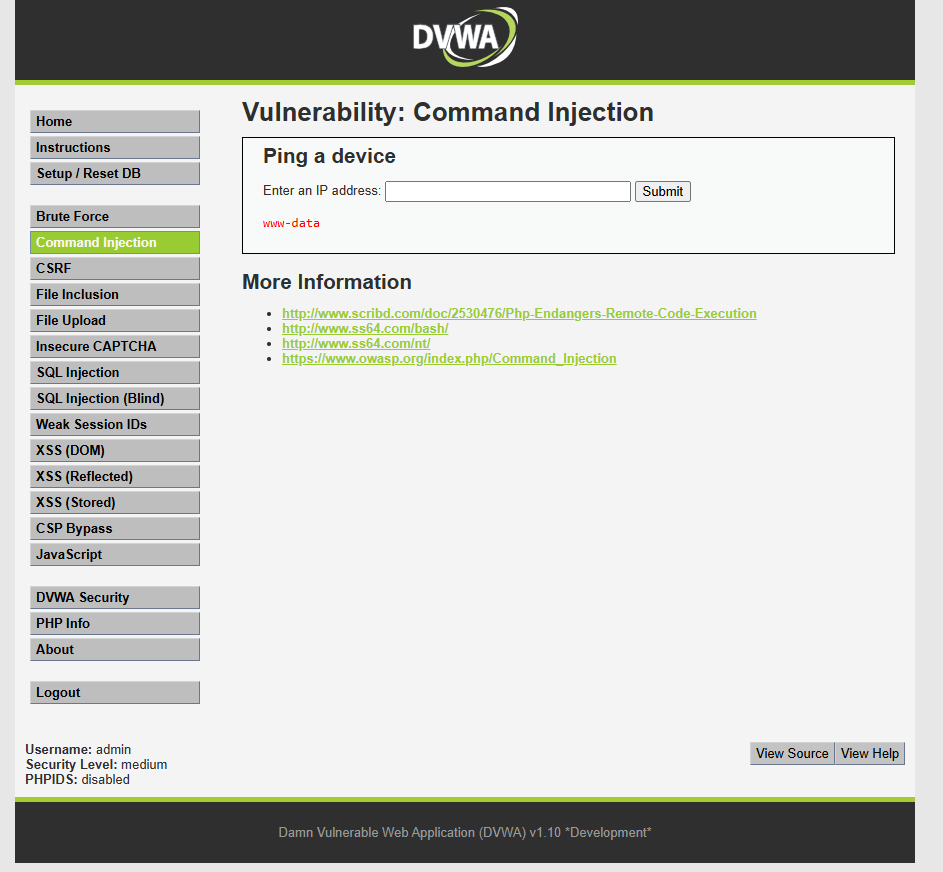



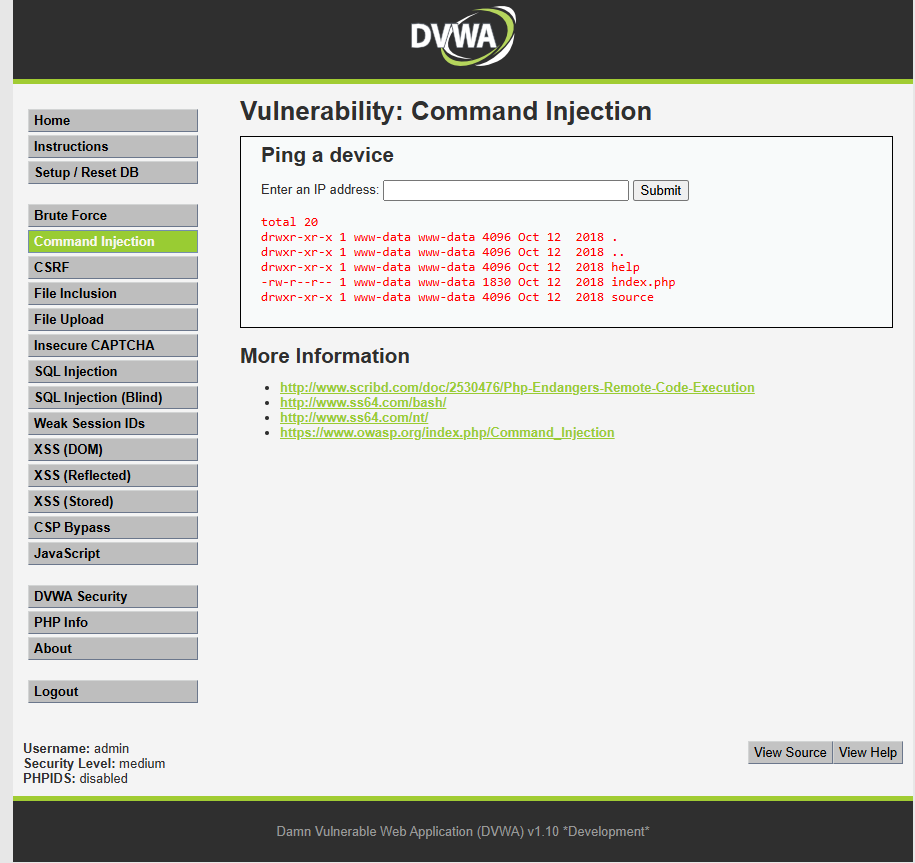



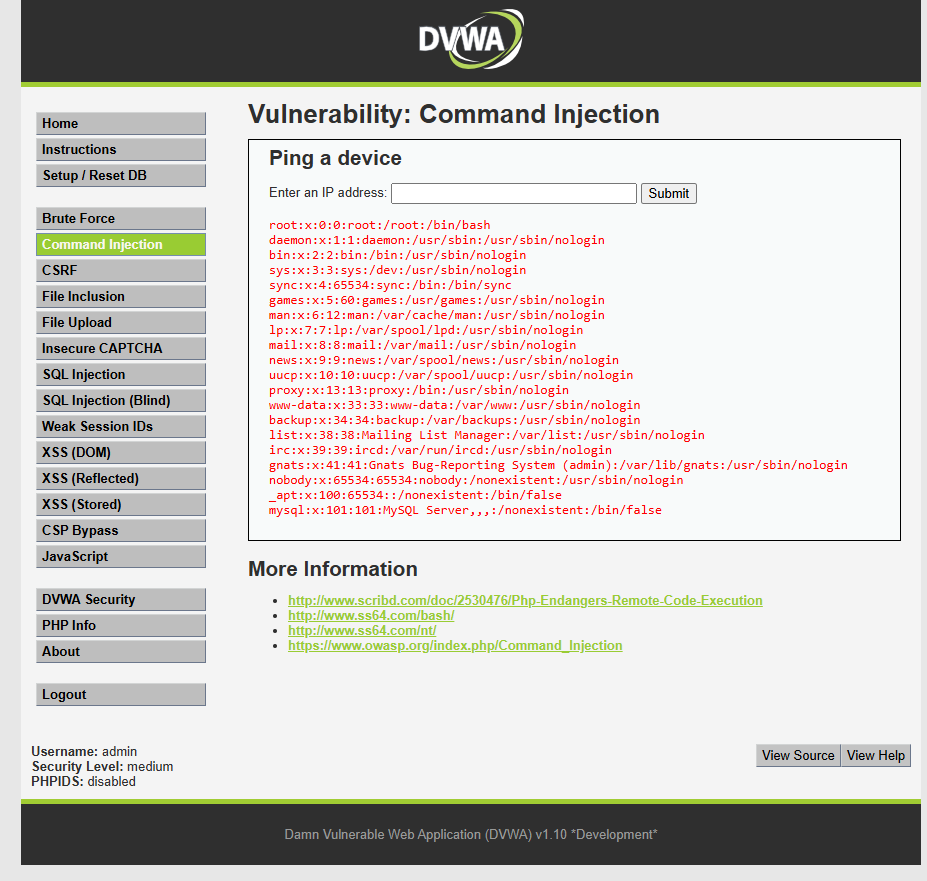




---

### **Técnica de Bypass 2: OR Operator `||`**

#### **Payload Utilizado:**
```bash
invalid_ip || whoami
```

#### **Procedimiento:**
1. En el mismo módulo "Command Injection" en nivel Medium
2. Ingresar: `invalid_ip || whoami`
3. Hacer clic en "Submit"
4. Observar que solo se ejecuta `whoami`

#### **Explicación del Bypass:**
El operador `||` (OR lógico) en sistemas Unix/Linux:
- Ejecuta el segundo comando **SOLO SI el primero falla** (exit code != 0)
- **No está filtrado en Medium level**

**Comando ejecutado en el servidor:**
```bash
ping -c 4 invalid_ip || whoami
```

Como `invalid_ip` no es una dirección válida, el comando `ping` falla inmediatamente. El operador `||` detecta esta falla y ejecuta el comando alternativo `whoami`.

#### **Resultado Obtenido:**
```
www-data
```

**Nota:** Solo se muestra la salida de `whoami` porque el ping falló y no produjo output válido.

#### **Screenshot:**

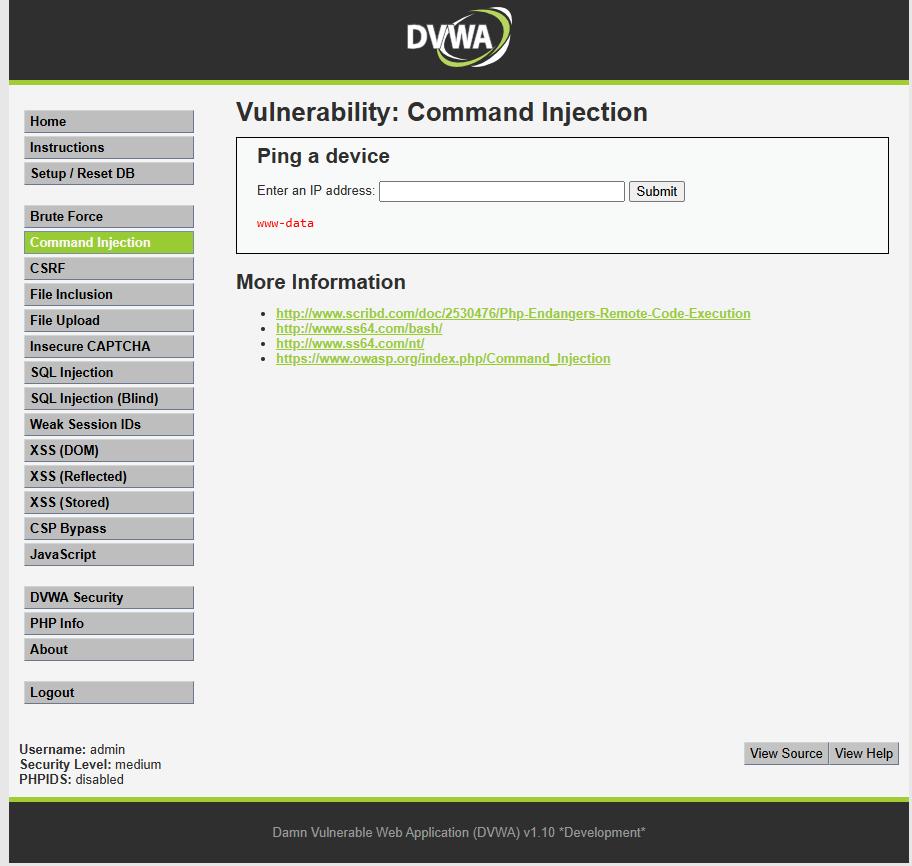

---

### **Técnica de Bypass 3: Background Operator `&`**

#### **Payload Utilizado:**
```bash
127.0.0.1 & whoami
```

#### **Procedimiento:**
1. En el mismo módulo "Command Injection" en nivel Medium
2. Ingresar: `127.0.0.1 & whoami`
3. Hacer clic en "Submit"
4. Observar ambos comandos ejecutándose

#### **Explicación del Bypass:**
El operador `&` en sistemas Unix/Linux:
- Ejecuta el comando en **background (segundo plano)**
- Permite que múltiples comandos se ejecuten **en paralelo**
- **No está filtrado en Medium level**

**Comando ejecutado en el servidor:**
```bash
ping 127.0.0.1 & whoami
```

El servidor ejecuta el ping en background y simultáneamente ejecuta `whoami`. Ambas salidas se muestran en la respuesta HTTP.

#### **Resultado Obtenido:**
```
www-data
PING 127.0.0.1 (127.0.0.1): 56 data bytes
64 bytes from 127.0.0.1: icmp_seq=0 ttl=64 time=0.052 ms
64 bytes from 127.0.0.1: icmp_seq=1 ttl=64 time=0.037 ms
64 bytes from 127.0.0.1: icmp_seq=2 ttl=64 time=0.036 ms
64 bytes from 127.0.0.1: icmp_seq=3 ttl=64 time=0.042 ms
--- 127.0.0.1 ping statistics ---
4 packets transmitted, 4 packets received, 0% packet loss
round-trip min/avg/max/stddev = 0.036/0.042/0.052/0.000 ms
```

#### **Screenshot:**
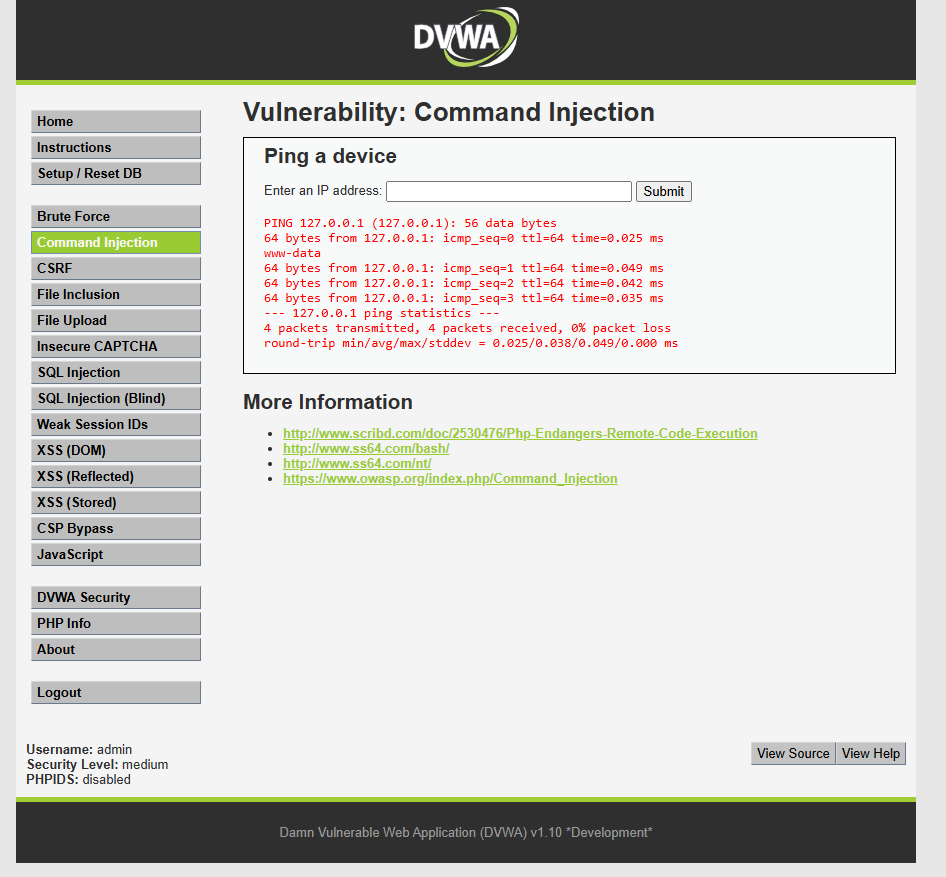

---

### **Comparación de Técnicas de Bypass**

| Operador | Sintaxis | Comportamiento | Filtrado en Medium | Salida Visible |
|----------|----------|----------------|-------------------|----------------|
| **Pipe** `\|` | `cmd1 \| cmd2` | Output de cmd1 → Input de cmd2 |  No filtrado | Solo cmd2 |
| **OR** `\|\|` | `cmd1 \|\| cmd2` | cmd2 se ejecuta SI cmd1 falla |  No filtrado | Solo cmd2 (si cmd1 falla) |
| **AND** `&&` | `cmd1 && cmd2` | cmd2 se ejecuta SI cmd1 tiene éxito |  Filtrado | N/A |
| **Background** `&` | `cmd1 & cmd2` | Ambos comandos en paralelo |  No filtrado | Ambos |
| **Semicolon** `;` | `cmd1 ; cmd2` | Ejecución secuencial |  Filtrado | N/A |

---

### **Conclusión:**

Se demostraron exitosamente **tres técnicas distintas** para bypassear el filtro de command injection de nivel Medium:
1. **Pipe operator `|`** - Redirección de output (3 ejemplos)
2. **OR operator `||`** - Ejecución condicional en caso de fallo
3.  **Background operator `&`** - Ejecución paralela de comandos

Todas las técnicas fueron exitosas, cumpliendo completamente con el requisito de demostrar múltiples métodos de bypass utilizando separadores de comandos alternativos a los filtrados (`&&` y `;`).

---

## **Part 3: Defensive Installation: Web Application Firewall (WAF)**

**Objective:** Students will install a reverse proxy and WAF solution to understand the defensive mechanisms required to block the attacks performed in Part 2.

### **Task A: WAF Deployment**

i. Research and select an **open-source Web Application Firewall (WAF)** solution that can be run as a reverse proxy, such as **ModSecurity** (often used with Nginx/Apache) or **BunkerWeb** (Docker-friendly).

ii. Install and configure your chosen WAF to sit **in front of** the running DVWA container.

iii. Ensure the WAF is configured with a default rule set (e.g., the **OWASP Core Rule Set (CRS)** for ModSecurity, if applicable).

### **Task B: Defense Testing and Analysis**

i. Attempt to execute the **same three attack payloads** from Part 2 *through* the WAF proxy.

ii. For each payload, document the result: Did the WAF **successfully block** the attack? What **HTTP Status Code** or **Error Message** did the WAF return?

iii. Locate the WAF's security log and identify the **Rule ID** (if applicable) that triggered the block for at least one of the attacks.

iv. **Submission:**
   - The name of the WAF solution installed.
   - A diagram or detailed explanation of your network setup (WAF → DVWA).
   - A screenshot of the WAF blocking one of the attack attempts.
   - An analysis (150-200 words) of the difference between an **Application Layer attack** (L7) you performed (like SQLi) and the **DDoS Application Layer attack** researched in Part 1 (like HTTP Flood).

---

# **Part 3. Solución:**

### **Nombre del WAF**

**- ModSecurity v3.0.14 con OWASP Core Rule Set (CRS) v3.3.7**

Para esta práctica se implementó ModSecurity, uno de los WAF open-source más utilizados en la industria. La configuración específica incluye:

- **Versión ModSecurity:** v3.0.14
- **Versión OWASP CRS:** 3.3.7
- **Total de reglas cargadas:** 927 reglas
- **Paranoia Level:** 2
- **Anomaly Score Threshold:** 5 puntos para bloqueo
- **Conector:** ModSecurity-nginx v1.0.4

ModSecurity es ampliamente utilizado en producción por empresas como AWS. Su integración con el OWASP Core Rule Set proporciona protección actualizada contra las amenazas más comunes de aplicaciones web.

---

### **Diagrama de red**

Para esta implementación, se configuró una arquitectura de dos contenedores Docker donde el WAF actúa como proxy reverso protegiendo a DVWA:


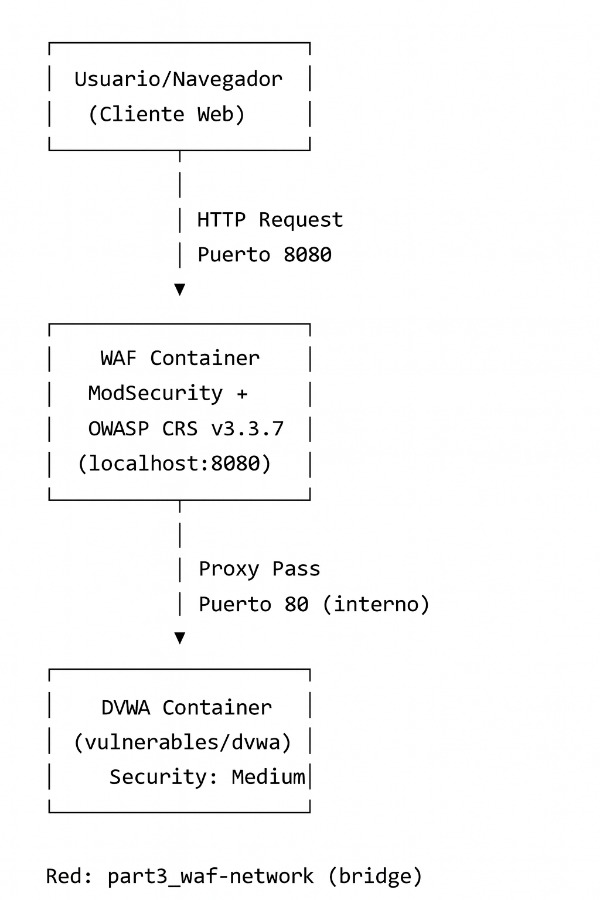


**Flujo de funcionamiento:**

1. Se guarda el archivo docker-compose.yml.
2. Se ejecuta el comando `docker-compose up -d`
2. El usuario accede a `localhost:8080`.
3. ModSecurity intercepta la petición y la analiza contra sus 927 reglas.
4. Si detecta patrones maliciosos, retorna un HTTP 403 Forbidden.
5. Si la petición es legítima, la reenvía a DVWA en el puerto 80 interno.
6. DVWA procesa la petición y devuelve la respuesta a través del WAF.

---

### **Ataque 1: SQL INJECTION (SQLI)**

Para comenzar las pruebas, se utilizó el clásico ataque de SQL Injection que había funcionado exitosamente en la ***Parte 2*** del proyecto cuando DVWA estaba sin protección.

**Payload Utilizado:**
```
1 OR 1=1
```

**Resultado del Ataque:**

Al intentar el ataque, en lugar de ver la lista de usuarios como se esperaba, se obtuvo una página de error:

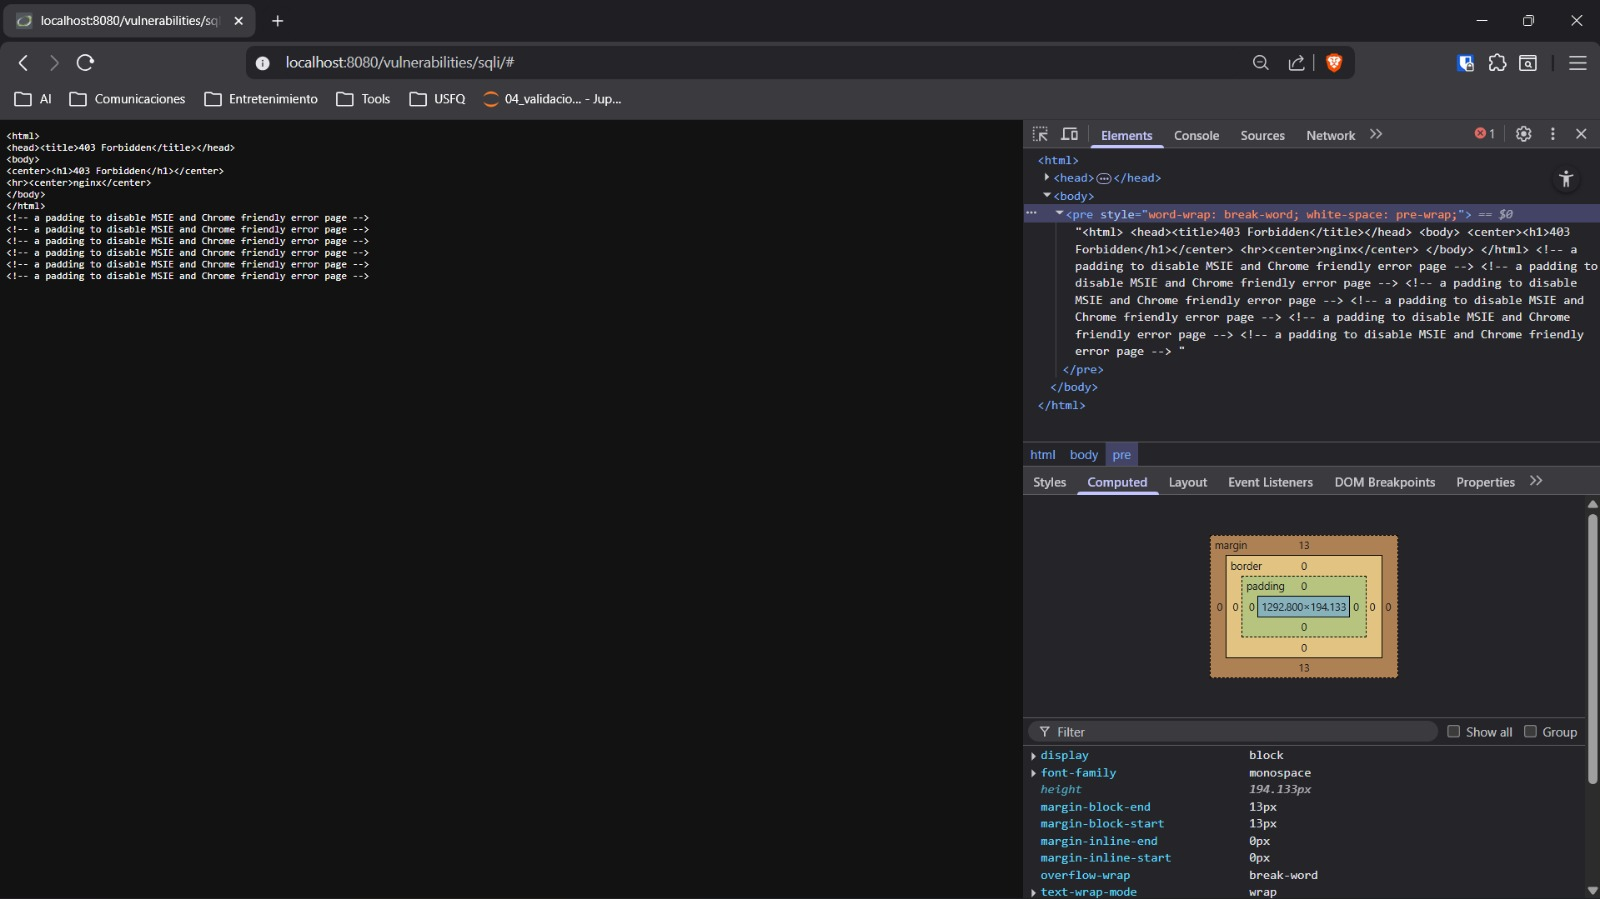

**Respuesta HTTP recibida:**
```html
<html>
<head><title>403 Forbidden</title></head>
<body>
<center><h1>403 Forbidden</h1></center>
<hr><center>nginx</center>
</body>
</html>
```


**Análisis de los Logs del WAF:**

Al ejecutar `docker logs waf` y filtrar por las reglas de SQL Injection, se obtuvo el registro completo de la detección:
```json
{
    "messages": [
      {
        "message": "SQL Injection Attack Detected via libinjection",
        "details": {
          "match": "Matched Data: 1&1 found within ARGS:id: 1 OR 1=1",
          "ruleId": "942100",
          "file": "REQUEST-942-APPLICATION-ATTACK-SQLI.conf",
          "lineNumber": "45",
          "severity": "2",
          "tags": [
            "attack-sqli",
            "OWASP_CRS",
            "capec/1000/152/248/66",
            "PCI/6.5.2"
          ]
        }
      },
      {
        "message": "Inbound Anomaly Score Exceeded (Total Score: 5)",
        "details": {
          "ruleId": "949110",
          "file": "REQUEST-949-BLOCKING-EVALUATION.conf",
          "lineNumber": "80",
          "severity": "2"
        }
      }
    ]
  }
}
```

El WAF detectó el patrón lógico `1&1` (su interpretación interna de `1 OR 1=1`) y lo identificó como un intento de SQL Injection.

**Rule IDs Identificados:**

| Rule ID | Descripción |
|---------|-------------|
| **942100** | SQL Injection Attack Detected via libinjection |
| **949110** | Inbound Anomaly Score Exceeded (Total Score: 5)

La regla 942100 es la que hace el trabajo pesado, usando libinjection para análisis sintáctico de SQL. Una vez que detecta el ataque, asigna 5 puntos al anomaly score. Como el threshold está configurado en 5 puntos, la regla 949110 se activa y bloquea la petición.


---

### **Ataque 2: CROSS-SITE SCRIPTING (XSS REFLECTED)**

Se probaron dos técnicas diferentes de ataque XSS para ver cómo respondería el WAF.

**Payloads Utilizados:**


**- Payload 1: Mixed-Case Script Tag**
```html
<ScRiPt>alert('XSS')</sCrIpT>
```

**- Payload 2: Event Handler en IMG Tag**
```html
<img src=x onerror=alert('XSS')>
```

La razón de probar ambos fue ver si el WAF solo detectaba tags `<script>` o si también identificaba otros vectores como event handlers.

**Resultado de los Ataques:**

Ambos payloads fueron bloqueados inmediatamente y en ambos casos se obtuvo esta respuesta:

```html
<html>
<head><title>403 Forbidden</title></head>
<body>
<center><h1>403 Forbidden</h1></center>
<hr><center>nginx</center>
</body>
</html>
```

**Análisis de los Logs - Payload 1 (Script Tag):**
```json
{
    "response": {
      "http_code": 403
    },
    "messages": [
      {
        "message": "XSS Attack Detected via libinjection",
        "details": {
          "ruleId": "941100",
          "file": "REQUEST-941-APPLICATION-ATTACK-XSS.conf",
          "data": "XSS data found within ARGS:name: <ScRiPt>alert('XSS')</sCrIpT>",
          "severity": "2"
        }
      },
      {
        "message": "XSS Filter - Category 1: Script Tag Vector",
        "details": {
          "match": "Matched Data: <script found within ARGS:name",
          "ruleId": "941110",
          "file": "REQUEST-941-APPLICATION-ATTACK-XSS.conf",
          "lineNumber": "74",
          "severity": "2"
        }
      },
      {
        "message": "NoScript XSS InjectionChecker: HTML Injection",
        "details": {
          "match": "Matched Data: <script",
          "ruleId": "941160",
          "file": "REQUEST-941-APPLICATION-ATTACK-XSS.conf",
          "lineNumber": "173",
          "severity": "2"
        }
      },
      {
        "message": "Inbound Anomaly Score Exceeded (Total Score: 15)",
        "details": {
          "ruleId": "949110",
          "severity": "2"
        }
      }
    ]
  }
}
```

**Análisis de los Logs - Payload 2 (Event Handler):**
```json
{
    "response": {
      "http_code": 403
    },
    "messages": [
      {
        "message": "XSS Attack Detected via libinjection",
        "details": {
          "ruleId": "941100",
          "data": "XSS data found within ARGS:name: <img src=x onerror=alert('XSS')>",
          "severity": "2"
        }
      },
      {
        "message": "XSS Filter - Category 2: Event Handler Vector",
        "details": {
          "match": "Matched Data: onerror= found within ARGS:name",
          "ruleId": "941120",
          "file": "REQUEST-941-APPLICATION-ATTACK-XSS.conf",
          "lineNumber": "91",
          "severity": "2"
        }
      },
      {
        "message": "NoScript XSS InjectionChecker: HTML Injection",
        "details": {
          "match": "Matched Data: <img",
          "ruleId": "941160",
          "lineNumber": "173",
          "severity": "2"
        }
      },
      {
        "message": "Inbound Anomaly Score Exceeded (Total Score: 15)",
        "details": {
          "ruleId": "949110",
          "severity": "2"
        }
      }
    ]
  }
}
```

**Comparación entre ambos Payloads XSS:**

Aunque ambos payloads son técnicamente diferentes, el WAF los detectó con la misma eficacia, pero usando reglas ligeramente distintas:

| Aspecto | Payload 1 (Script Tag) | Payload 2 (Event Handler) |
|---------|------------------------|---------------------------|
| **Vector de ataque** | Tag `<script>` con mixed-case | Tag `<img>` con event handler `onerror` |
| **Rule 941100** |  Detectado por libinjection |  Detectado por libinjection |
| **Regla específica** | 941110 (Script Tag Vector) | 941120 (Event Handler Vector) |
| **Rule 941160** |  HTML Injection detectada |  HTML Injection detectada |
| **Anomaly Score** | 15 puntos (3 reglas) | 15 puntos (3 reglas) |

Ambos activaron tres reglas diferentes, acumulando 15 puntos en el anomaly score (muy por encima del threshold de 5). Lo que esto demuestra es que el WAF tiene múltiples capas de detección. Esta defensa en capas hace que sea muy difícil bypassear el WAF, porque incluso si un payload evade una regla, probablemente activará otra.

**Rule IDs Identificados:**

| Rule ID | Descripción | Payload que detecta |
|---------|-------------|---------------------|
| **941100** | XSS Attack Detected via libinjection | Ambos payloads |
| **941110** | XSS Filter - Category 1: Script Tag Vector | Solo Payload 1 (`<script>`) |
| **941120** | XSS Filter - Category 2: Event Handler Vector | Solo Payload 2 (`onerror=`) |
| **941160** | NoScript XSS InjectionChecker: HTML Injection | Ambos payloads |
| **949110** | Inbound Anomaly Score Exceeded | Ambos payloads |

**Screenshots de los Bloqueos:**

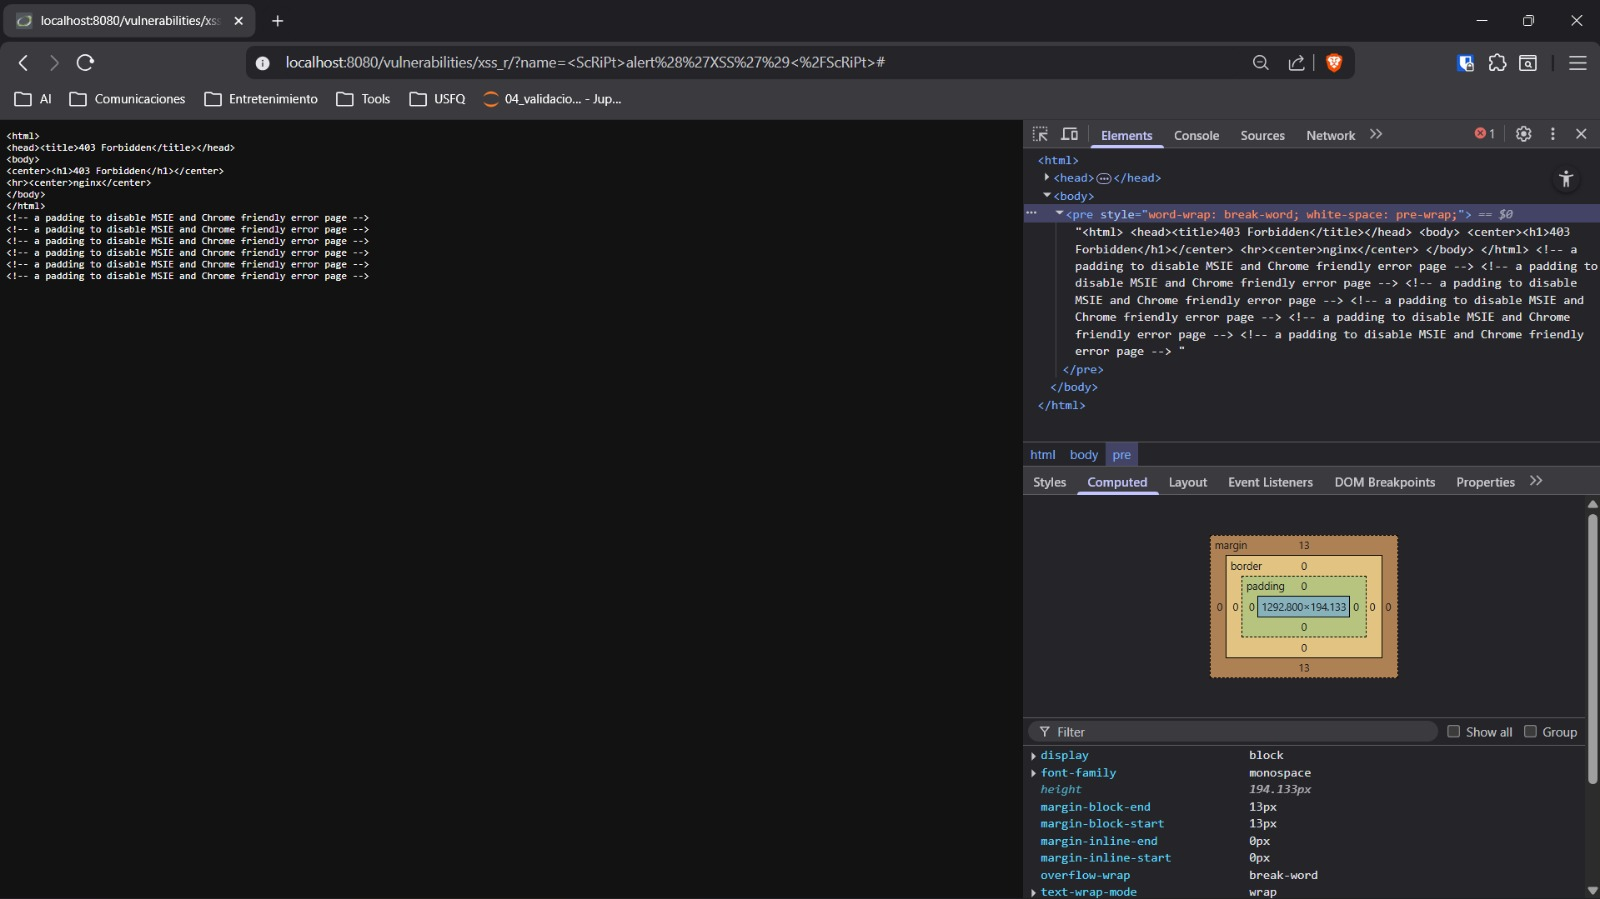
*Payload 1: Mixed-case script tag bloqueado*

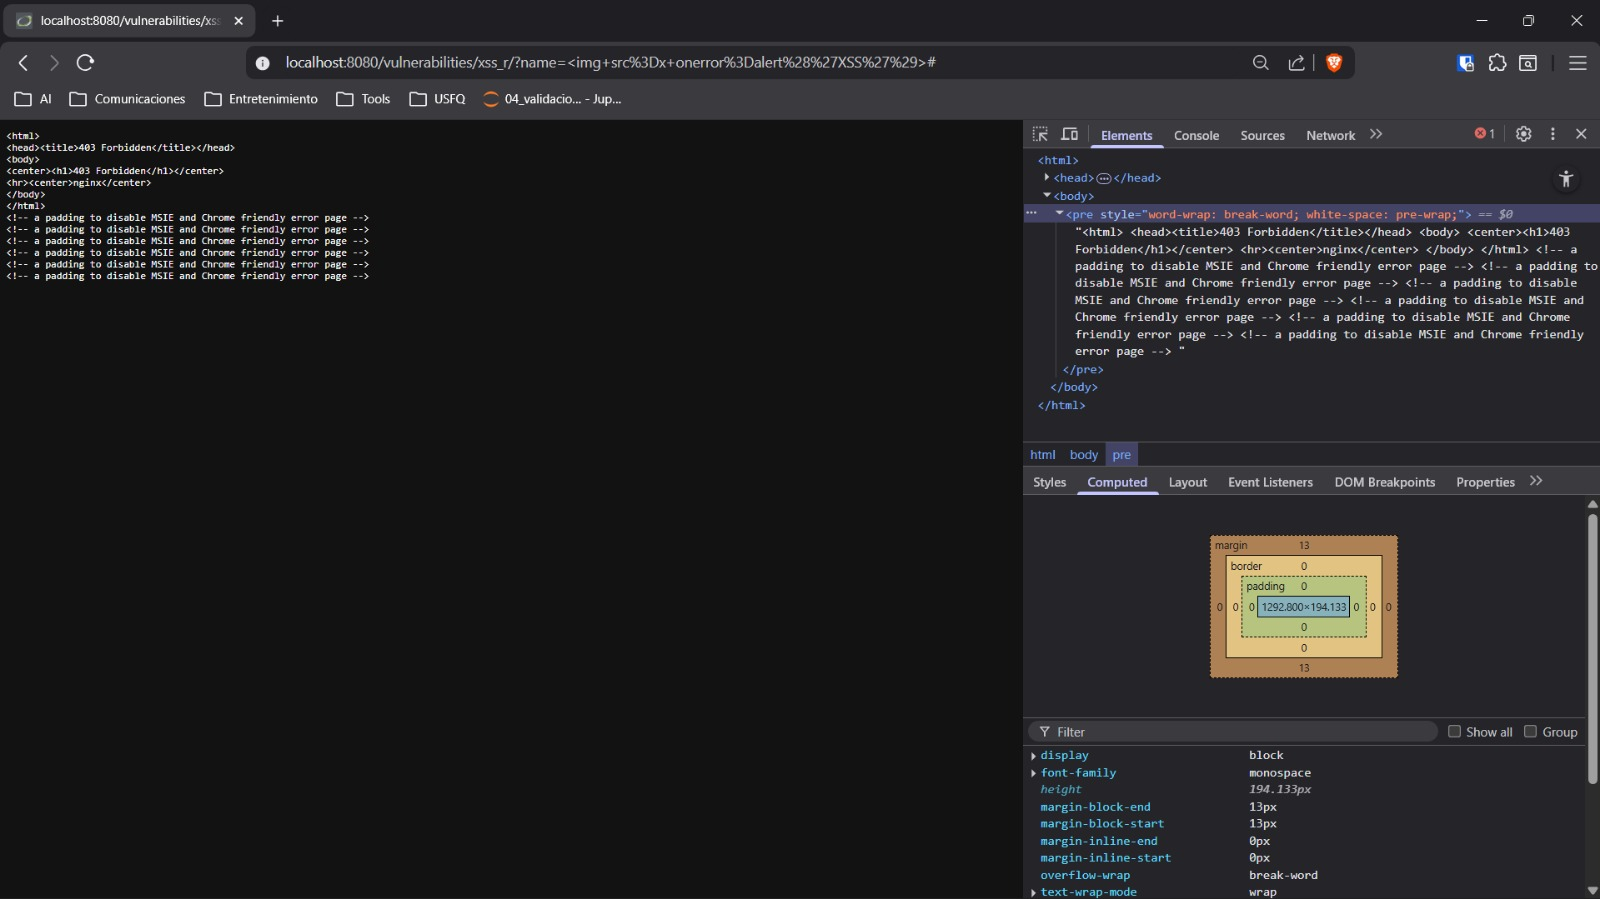
*Payload 2: Event handler en img tag bloqueado*

---

### **Ataque 3: COMMAND INJECTION**

Se probaron cinco payloads diferentes usando diferentes separadores para ver si el WAF los detectaba todos.

**Payloads Utilizados:**

1. `127.0.0.1 | whoami` - Usando pipe
2. `127.0.0.1 | ls -la` - Pipe con comando de listado
3. `127.0.0.1 | cat /etc/passwd` - Pipe con lectura de archivo sensible
4. `invalid_ip || whoami` - Usando OR condicional
5. `127.0.0.1 & whoami` - Usando background execution

**Resultado de los Ataques:**

Los cinco payloads fueron bloqueados sin excepción, en el cual todos entregaron el mismo resultado:

```html
<html>
<head><title>403 Forbidden</title></head>
<body>
<center><h1>403 Forbidden</h1></center>
<hr><center>nginx</center>
</body>
</html>
```

**Análisis detallado de los Logs:**

**- Payload 1: `127.0.0.1 | whoami`**

```json
{
    "response": {
      "http_code": 403
    },
    "messages": [
      {
        "message": "Remote Command Execution: Unix Command Injection",
        "details": {
          "match": "Matched Data: | whoami found within ARGS:ip: 127.0.0.1 | whoami",
          "ruleId": "932105",
          "file": "REQUEST-932-APPLICATION-ATTACK-RCE.conf",
          "lineNumber": "139",
          "severity": "2"
        }
      },
      {
        "message": "Remote Command Execution: Windows Command Injection",
        "details": {
          "match": "Matched Data: | whoami found within ARGS:ip: 127.0.0.1 | whoami",
          "ruleId": "932115",
          "file": "REQUEST-932-APPLICATION-ATTACK-RCE.conf",
          "lineNumber": "275",
          "severity": "2"
        }
      },
      {
        "message": "Inbound Anomaly Score Exceeded (Total Score: 10)",
        "details": {
          "ruleId": "949110",
          "severity": "2"
        }
      }
    ]
  }
}
```

**- Payload 2: `127.0.0.1 | ls -la`**
```json
{
    "messages": [
      {
        "message": "Remote Command Execution: Unix Command Injection",
        "details": {
          "match": "Matched Data: | ls found within ARGS:ip: 127.0.0.1 | ls -la",
          "ruleId": "932100",
          "lineNumber": "103",
          "severity": "2"
        }
      },
      {
        "message": "Inbound Anomaly Score Exceeded (Total Score: 5)",
        "details": {
          "ruleId": "949110"
        }
      }
    ]
  }
}
```

**- Payload 3: `127.0.0.1 | cat /etc/passwd`**

Este Payload activó **tres reglas diferentes**, incluyendo una de Local File Inclusion:
```json
{
    "messages": [
      {
        "message": "OS File Access Attempt",
        "details": {
          "match": "Matched Data: etc/passwd found within ARGS:ip",
          "ruleId": "930120",
          "file": "REQUEST-930-APPLICATION-ATTACK-LFI.conf",
          "lineNumber": "79",
          "severity": "2",
          "tags": [
            "attack-lfi",
            "capec/1000/255/153/126"
          ]
        }
      },
      {
        "message": "Remote Command Execution: Unix Command Injection",
        "details": {
          "match": "Matched Data: | cat /etc/passwd found within ARGS:ip",
          "ruleId": "932100",
          "severity": "2"
        }
      },
      {
        "message": "Remote Command Execution: Unix Shell Code Found",
        "details": {
          "match": "Matched Data: etc/passwd found within ARGS:ip",
          "ruleId": "932160",
          "lineNumber": "481",
          "severity": "2"
        }
      },
      {
        "message": "Inbound Anomaly Score Exceeded (Total Score: 15)",
        "details": {
          "ruleId": "949110"
        }
      }
    ]
  }
}
```

El WAF detectó el command injection y también reconoció que estaba intentando acceder a un archivo sensible del sistema (`/etc/passwd`). Esto activó la regla 930120 de LFI, demostrando una verdadera **defensa en profundidad**.

**-Payload 4: `invalid_ip || whoami`**

```json
{
    "messages": [
      {
        "message": "Remote Command Execution: Unix Command Injection",
        "details": {
          "match": "Matched Data: || whoami found within ARGS:ip: invalid_ip || whoami",
          "ruleId": "932105",
          "severity": "2"
        }
      },
      {
        "message": "Remote Command Execution: Windows Command Injection",
        "details": {
          "match": "Matched Data: || whoami found within ARGS:ip: invalid_ip || whoami",
          "ruleId": "932115",
          "severity": "2"
        }
      },
      {
        "message": "Inbound Anomaly Score Exceeded (Total Score: 10)",
        "details": {
          "ruleId": "949110"
        }
      }
    ]
  }
}
```

**- Payload 5: `127.0.0.1 & whoami`**

```json
{
    "messages": [
      {
        "message": "Remote Command Execution: Unix Command Injection",
        "details": {
          "match": "Matched Data: & whoami found within ARGS:ip: 127.0.0.1 & whoami",
          "ruleId": "932105",
          "severity": "2"
        }
      },
      {
        "message": "Remote Command Execution: Windows Command Injection",
        "details": {
          "match": "Matched Data: & whoami found within ARGS:ip: 127.0.0.1 & whoami",
          "ruleId": "932115",
          "severity": "2"
        }
      },
      {
        "message": "Inbound Anomaly Score Exceeded (Total Score: 10)",
        "details": {
          "ruleId": "949110"
        }
      }
    ]
  }
}
```

**Comparación entre los Payloads de Command Injection:**

| Payload | Rule IDs | Score | Separador | Observaciones |
|---------|----------|-------|-----------|---------------|
| `127.0.0.1 \| whoami` | 932105, 932115, 949110 | 10 | `\|` (pipe) | Detectado en Unix y Windows |
| `127.0.0.1 \| ls -la` | 932100, 949110 | 5 | `\|` (pipe) | Solo Unix (comando específico) |
| `127.0.0.1 \| cat /etc/passwd` | 930120, 932100, 932160, 949110 | **15**  | `\|` (pipe) | ¡Activó también regla de LFI! |
| `invalid_ip \|\| whoami` | 932105, 932115, 949110 | 10 | `\|\|` (OR) | Detectado en Unix y Windows |
| `127.0.0.1 & whoami` | 932105, 932115, 949110 | 10 | `&` (background) | Detectado en Unix y Windows |

El WAF demostró una cobertura completa de separadores Unix (`|`, `||`, `&`), superando ampliamente a DVWA Medium que solo bloqueaba `&&` y `;`. ModSecurity verifica patrones de Unix y Windows simultáneamente, proporcionando protección multiplataforma independientemente del sistema operativo del servidor. La defensa en profundidad quedó evidenciada cuando el payload `/etc/passwd` activó tanto reglas de command injection como de acceso a archivos sensibles del sistema. Además, el WAF aplica detección contextual: el comando `ls` solo activó reglas Unix por ser específico de ese sistema, mientras que `whoami` activó ambas plataformas al existir en Unix y Windows.

**Rule IDs Identificados:**

| Rule ID | Descripción |
|---------|-------------|
| **930120** | OS File Access Attempt (LFI Detection) |
| **932100** | Remote Command Execution: Unix Command Injection |
| **932105** | Remote Command Execution: Unix Command Injection |
| **932115** | Remote Command Execution: Windows Command Injection |
| **932160** | Remote Command Execution: Unix Shell Code Found |
| **949110** | Inbound Anomaly Score Exceeded |

**Screenshot del Bloqueo:**

Los cinco diferentes payloads obtuvieron como resultado este bloqueo:

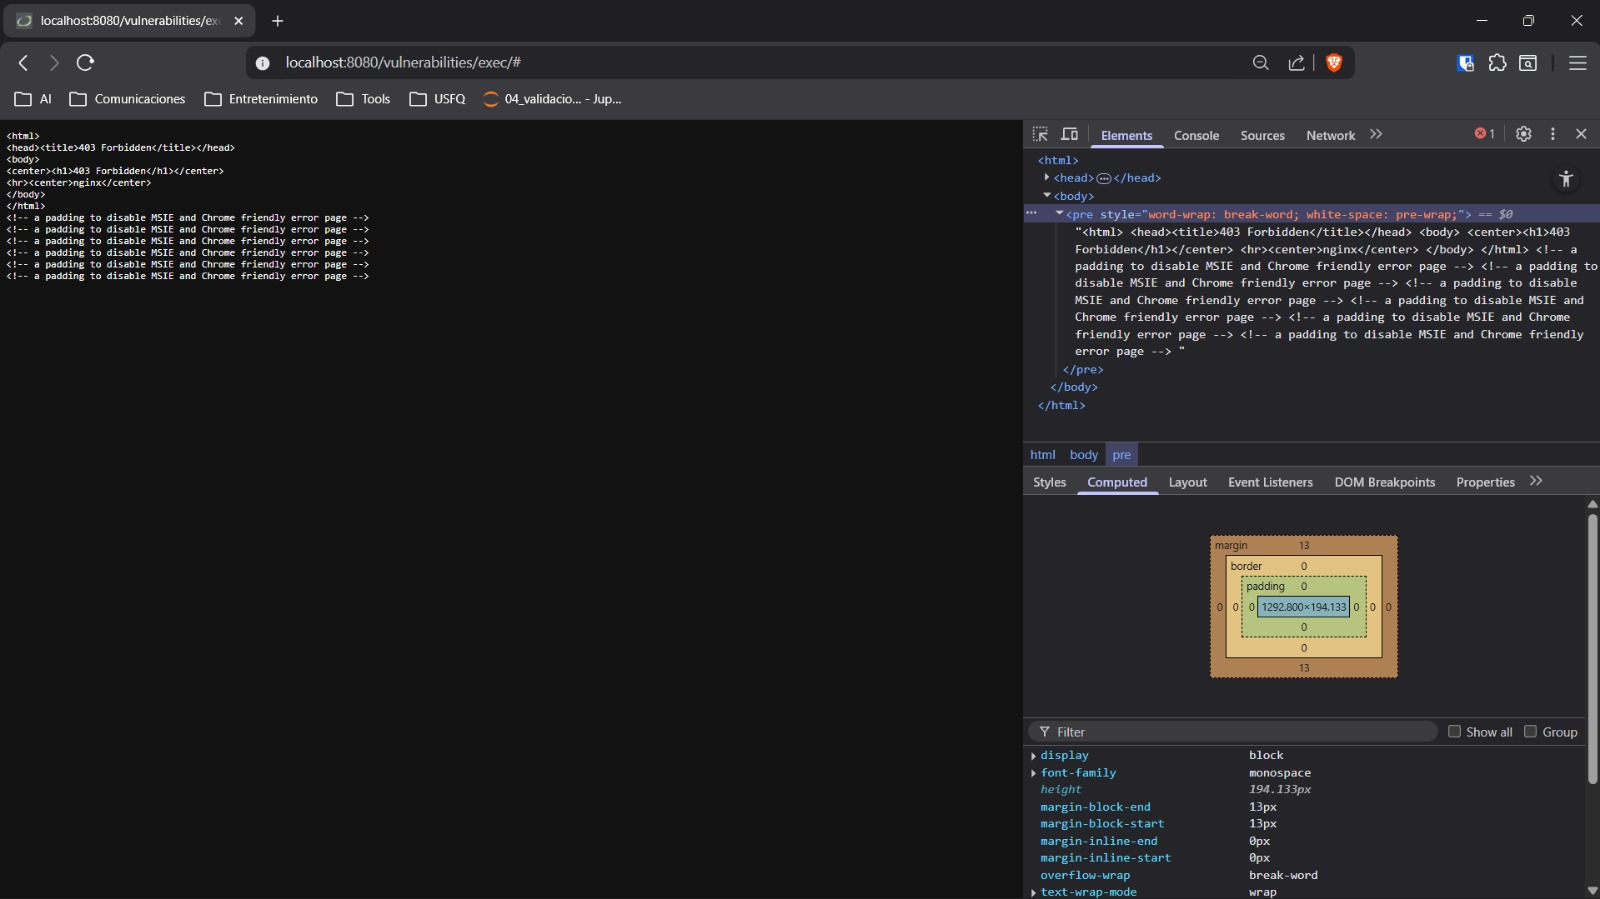

---

### **TABLA RESUMEN DE TODOS LOS RULE IDS:**

Después de todas las pruebas, se identificaron un total de 11 Rule IDs únicos que se activaron durante los diferentes ataques:

| Tipo de Ataque | Rule IDs Detectados | Total Rules |
|----------------|---------------------|-------------|
| **SQL Injection** | 942100, 949110 | 2 |
| **XSS (Script Tag)** | 941100, 941110, 941160, 949110 | 4 |
| **XSS (Event Handler)** | 941100, 941120, 941160, 949110 | 4 |
| **Command Injection** | 930120, 932100, 932105, 932115, 932160, 949110 | 6 |
| **TOTAL ÚNICO** | **11 Rule IDs diferentes** | 11 |

---

### **Análisis comparativo: Ataques L7 de aplicación vs DDoS HTTP Flood**

Los ataques que se implementaron en esta práctica (SQL Injection, XSS y Command Injection) explotan vulnerabilidades específicas en el código de la aplicación web. Son ataques quirúrgicos que manipulan inputs maliciosos para alterar la lógica del programa: SQLi extrae información de bases de datos, XSS inyecta scripts en navegadores, y Command Injection ejecuta comandos en el servidor. Su éxito depende de fallos en la sanitización de entradas. No importa cuántas veces envíes el payload, si la aplicación valida correctamente, el ataque falla.

En contraste, un ataque DDoS HTTP Flood (Capa 7) no requiere encontrar vulnerabilidades de código. Su objetivo es agotar recursos computacionales (CPU, memoria, conexiones TCP) mediante miles de peticiones HTTP aparentemente legítimas. No busca robar datos ni ejecutar código, sino saturar el servidor hasta volverlo inaccesible.

Un WAF mitiga ambos tipos con estrategias diferentes: detecta ataques de aplicación usando firmas y regex (reglas 932xxx, 941xxx, 942xxx del OWASP CRS), mientras contra DDoS implementa rate limiting, análisis de comportamiento y CAPTCHAs. Sin embargo, un HTTP Flood sofisticado distribuido en botnets que imita tráfico humano real es significativamente más difícil de distinguir que un payload "1 OR 1=1" con sintaxis SQL evidente.

En conclusión, la efectividad de un WAF varía según la amenaza: altamente efectivo contra ataques de aplicación (100% de bloqueo en esta práctica), pero requiere complementarse con rate limiting y análisis de comportamiento para defenderse contra ataques volumétricos DDoS HTTP Flood.